# 이론

## 문제: 훈련 데이터가 한 번에 준비되는 것이 아니라, 조금씩 전달된다는 것.

매번 데이터가 추가될 때마다 새로 훈련? --> 시간과 비용/공간이 비례 --> 지속 불가

그러면 기존의 데이터의 일부를 버리는 건? --> 중요 데이터가 있을 수 있다. --> 불안정

---

이전에 훈련한 모델을 버리지 않고, 새로운 데이터에 대해서만 조금씩 더 훈련할 수는 없을까? --> 점진적 학습

확률적 경사 하강법(SGD; Stochastic Gradient Descent): 대표적인 점진적 학습 알고리즘

## 확률적 경사 하강법

확률적 경사 하강법 모델의 훈련 원리
- 가장 가파른 경사를 따라 원하는 지점까지 내려가기
- 단, step이 너무 큰 경우, 내려가긴 커녕 올라갈 수도 있다.
    - 조금씩 내려오는 것이 중요.
- "확률적": 가장 가파른 길을 찾는 방법은 무엇인가?
    - 훈련 세트를 이용하여 가장 가파른 길을 찾는다.
    - 단, 전체 샘플을 사용하지 않고, 딱 하나의 샘플을 랜덤하게 골라 가장 가파른 길을 찾는다.
        - "랜덤하게" --> "확률적"

확률적 경사 하강법은
- 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다.
- 그다음, 훈련 세트에서 또 하나의 샘플을 선택하여 경사를 조금 내려간다.
- 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.

훈련 세트를 다 사용했는데도 아직 목표점에 닿지 못했다면?
- 다시 훈련 세트에 모든 샘플을 채워넣고, 위의 과정을 반복한다.
- 에포크: 확률적 경사 하강법에서, 훈련 세트를 한 번 모두 사용하는 과정

미니배치 경사 하강법: 무작위로 몇 개의 샘플을 선택하여 경사를 내려가는 것.

배치 경사 하강법: 전체 샘플을 사용하여 경사를 내려가는 것

확률적 경사 하강법을 반드시 사용하는 알고리즘 --> 신경망 알고리즘
- 신경망은 일반적으로 많은 데이터를 사용하기 때문에, 한 번에 모든 데이터를 사용하기 어렵다.
- 또한 모델이 매우 복잡하기 때문에, 수학적인 방법으로 해답을 얻기 어렵다.

## 손실 함수

확률적 경사 하강법으로 조금씩 내려간다는 그 '산'이 바로 '손실 함수(loss function)'이다.

손실 함수의 값이 작을 수록 좋겠지만, 그 최소값을 수학적으로 계산하기는 어렵다.
- 이 값을 찾아 조금씩 이동하려면 확률적 경사 하강법이 좋겠다.

그렇다면 분류 문제에서 손실 함수를 정확도의 음수를 취해도 될까?
- 정확도가 1이면, 손실은 -1이고, 정확도가 0이면 손실이 0
- 정확도로 손실을 계산하는 것의 치명적 단점.
    - '듬성듬성한(불연속적인)' 확률 --> 산이 듬성듬성 --> 조금씩 내려갈 수 없다.
    - --> 손실 함수는 미분 가능해야 한다.

어떻게 하면 연속적인 손실 함수를 만들 수 있을까

### 로지스틱 손실 함수

샘플 4개의 타깃은 [1, 1, 0, 0]이고,

샘플 4개에 대한 예측이 [1, 0, 0, 1]이고,

샘플 4개에 대한 예측 확률은 각각 [0.9, 0.3, 0.2, 0.8]이라고 가정해보자.

손실 함수는 (-1) * (타깃 * 예측 확률)
- 첫 번째 샘플: 타깃이 1이고, 확률이 0.9이므로, 손실은 -0.9
- 두 번째 샘플: 타깃이 1이고, 확률이 0.3이므로, 손실은 -0.3
- 세 번째 샘플: 타깃이 0이고, 확률이 0.2이므로, 손실은 0?
    - 타깃이 0이면 항상 손실이 0이 될 것. --> 타깃 1에 대한 식으로 바꾸자.
    - 타깃이 1이고, 확률이 0.8이라는 말과 같으므로, 손실은 -0.8 # 꽤 낮은 손실 (올바른 분류)
- 네 번째 샘플: 타깃이 0이고, 확률이 0.8이므로, 손실은 -0.2

이런 식으로 계산하다보면 연속적인 손실 함수를 얻을 수 있지 않을까?

그리고, 예측 확률에 로그를 씌우면 손실은 양수가 되기 때문에, 더 이해하기 쉬울 것 같다.

---

타깃==1 일 때) 손실 == -log(예측 확률)
- 확률이 1에서 멀어질 수록 손실은 아주 큰 양수가 된다.

타깃==0 일 때) 손실 == -log(1-예측 확률)
- 확률이 0에서 멀어질 수록 손실은 아주 큰 양수가 된다.

이렇게 만들어진 손실 함수를 "로지스틱 손실 함수" 또는 "이진 크로스엔트로피 손실 함수"라고 부른다.

다중 분류에서 사용하는 손실 함수는 "크로스엔트로피 손실 함수"

분류가 아닌 회귀 모델에서는 주로 어떤 손실 함수를 쓰는가?

평균 절댓값 오차: 타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값
평균 제곱 오차: 타깃에서 예측을 뺀 값을 제곱한 후 모든 샘플에 평균한 값

--> 작을수록 좋다.

# 확률적 경사 하강법을 사용한 분류 모델 만들기

In [1]:
# 데이터 불러오기
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

# 입력과 타깃 분리
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 훈련 세트와 테스트 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 데이터 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [2]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 클래스 임포트
from sklearn.linear_model import SGDClassifier

SGDClassifier 객체 생성 시, 2개의 매개변수를 지정한다.
- loss: 손실 함수의 종류를 지정 (default: 'hinge': 서포트 벡터 머신을 위한 손실 함수)
    - 'log': 로지스틱 손실 함수
        - 다중 분류에서 'log'를 걸면, 클래스마다 이진 분류 모델을 만든다.
        - 한 클래스를 양성으로 두고, 나머지 클래스를 모두 음성으로 두는 방식
- max_iter: 수행할 에포크 횟수 (default: 1000)
    - 10으로 설정
- 그 외의 매개변수
    - penalty: 규제의 종류 (default: 'l2')
    - alpha: 규제의 강도 (default: 0.0001)
    - tol: 인내. 반복을 멈출 조건. n_iter_no_change 매개변수에서 지정한 에포크 동안, 손실이 tol만큼 줄어들지 않으면 중단. (default: 0.001)
    - n_iter_no_change: 위와 같음 (default: 5)

In [3]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target) # 샘플을 하나씩 꺼내어 경사 하강법 단계를 수행한다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


10회 반복이 아직은 부족한 것 같다.

하지만, 확률적 경사 하강법은 점진적 학습이 가능하다.

partial_fit() 함수를 통해, 모델을 이어서 훈련시켜보자

In [4]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


확실히 정확도가 더 향상되었다.

하지만 얼마나 더 훈련해야 할 지, 기준이 필요해 보인다.
- 에포크가 적으면 --> 덜 학습 --> 과소 적합
- 에포크가 많으면 --> 너무 학습 --> 과대 적합

과대 적합이 일어나기 직전에 '조기 종료(early stopping)'을 하는 것이 중요하겠다.

한번, 어느 시점에서 조기 종료를 하면 좋을지 그래프를 만들어보자.

In [6]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # partial_fit() 으로 훈련을 시작하려면, 전체 클래스의 라벨을 전달해주어야 한다. 

In [7]:
for _ in range(0, 300): # _ 변수는 나중에 안 쓰고 버리는 값을 넣어두는 용도로 사용
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

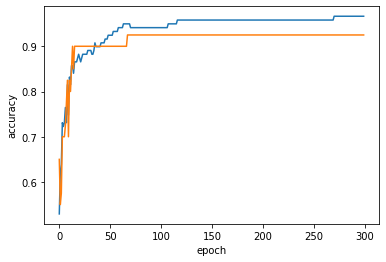

In [8]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

데이터 세트가 작기 때문에, 아주 잘 드러나지는 않지만, 한 100 epochs 정도가 적절해 보인다.

에포크를 100으로 맞추고 다시 훈련 및 평가를 해보자.

In [11]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol을 없애두지 않으면, 훈련이 도중에 멈춘다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


확률적 경사 하강법을 이용한 회귀 모델도 존재한다. SGDRegressor

<참고>

SGDClassifier의 loss 매개변수 기본값 'hinge'는, SVM이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.

힌지 손실 함수를 이용하여 동일하게 모델을 훈련시켜보자.

In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # tol을 없애두지 않으면, 훈련이 도중에 멈춘다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
